# Auto-MPG Îã§Ìï≠ÌöåÍ∑Ä Î∂ÑÏÑù(Poly Regression)

# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ïò§Î•ò Î©îÏÑ∏ÏßÄ ÏïàÎú®Í≤å
import warnings
warnings.filterwarnings(action='ignore')

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÌïòÍ∏∞

## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ & Ï†ÑÏ≤òÎ¶¨

  
  
--> Ïö∞Î¶¨Í∞Ä Ïù¥ÎØ∏ ÏïåÍ≥† ÏûàÎäîÍ≤É !
* Îã®ÏàúÌöåÍ∑ÄÎ•º ÎèåÎ†§Î≥¥Î©¥ÏÑú Ïó¥Ïù¥Î¶ÑÏù¥ ÏóÜÎã§Îäî Í≤É
* Í≤∞Ï∏°ÏπòÍ∞Ä ?Î°ú ÎêòÏñ¥ÏûàÎäî Í≤É
* horsepowerÍ∞Ä Î¨∏ÏûêÏó¥ ÌòïÏãùÏùÑ Ï∑®ÌïòÍ≥† ÏûàÎã§Îäî Í≤É

In [3]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('auto-mpg.csv', header=None)

In [4]:
# Ïó¥ Ïù¥Î¶Ñ ÎÑ£Í∏∞
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name']

In [5]:
# horsepowerÏùò Í≤∞Ï∏°ÏπòÍ∞Ä ? Î°ú ÎêòÏñ¥ÏûàÎäî Í≤É
df.horsepower.replace('?', np.nan, inplace=True)
df.dropna(subset=["horsepower"],axis=0, inplace=True)

# ÏûêÎ£åÌòï Î≥ÄÍ≤Ω (Î¨∏ÏûêÏó¥ ->Ïà´Ïûê)
df.horsepower = df.horsepower.astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

<AxesSubplot:>

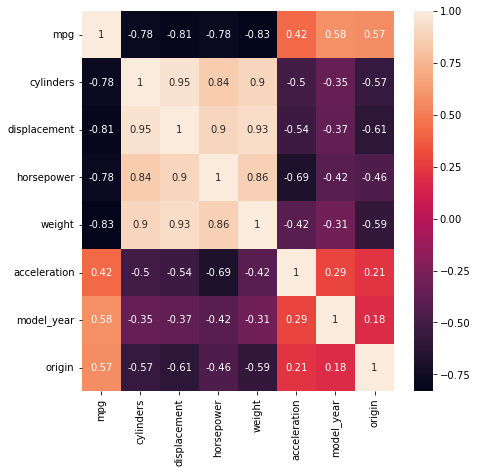

In [8]:
# ÌïÑÏöîÏóÜÎäî Ïó¥ ÎπºÍ∏∞
plt.figure(figsize=(7,7))
sns.heatmap(data=df.iloc[:,:-1].corr(),annot=True)

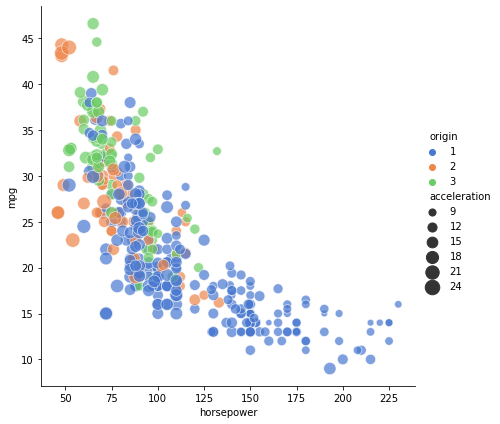

In [9]:
#originÏùÑ Í∞ÄÏ†∏Í∞àÍπå Ïã∂Îã§Í∞Ä.... Ìù†... Í∑∏ÎÉ• Îë¨ÏïºÍ≤†Îã§.

sns.relplot(x='horsepower', y='mpg', hue='origin', size='acceleration',
            sizes=(40, 220), alpha=.7, palette='muted',
            height=6, data=df)
plt.show()

In [10]:
fdf= df[['mpg', 'cylinders', 'horsepower', 'weight']]

In [11]:
fdf.describe()

mpg   cylinders  horsepower       weight
count  392.000000  392.000000  392.000000   392.000000
mean    23.445918    5.471939  104.469388  2977.584184
std      7.805007    1.705783   38.491160   849.402560
min      9.000000    3.000000   46.000000  1613.000000
25%     17.000000    4.000000   75.000000  2225.250000
50%     22.750000    4.000000   93.500000  2803.500000
75%     29.000000    8.000000  126.000000  3614.750000
max     46.600000    8.000000  230.000000  5140.000000

In [12]:
# weightÏùò Í≤ΩÏö∞ Îã®ÏúÑÎ•º kg -> ÌÜ§ Îã®ÏúÑÎ°ú Î∞îÍæ∏Í∏∞!
fdf.weight = df.weight.map(lambda x: x*0.001)

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

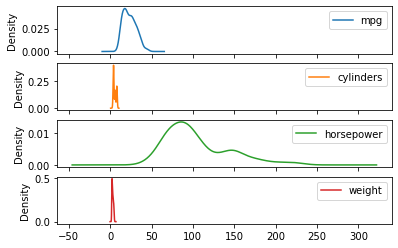

In [13]:
fdf.plot(kind="density", subplots=True)

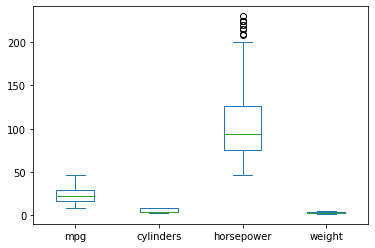

In [14]:
fdf.plot(kind="box")
plt.show()

In [15]:
# horsepowerÏùò ÏóÑÏ≤≠ Í∞íÏù¥ ÌÅ¨Í∏∞Ïóê ÌëúÏ§ÄÌôî ÏãúÌÇ§Í∏∞! 

from sklearn.preprocessing import StandardScaler

st = StandardScaler()

st_df = st.fit_transform(fdf)
st_df = pd.DataFrame(st_df)
st_df.columns = fdf.columns

In [16]:
st_df

mpg  cylinders  horsepower    weight
0   -0.698638   1.483947    0.664133  0.620540
1   -1.083498   1.483947    1.574594  0.843334
2   -0.698638   1.483947    1.184397  0.540382
3   -0.955212   1.483947    1.184397  0.536845
4   -0.826925   1.483947    0.924265  0.555706
..        ...        ...         ...       ...
387  0.455941  -0.864014   -0.480448 -0.221125
388  2.636813  -0.864014   -1.364896 -0.999134
389  1.097374  -0.864014   -0.532474 -0.804632
390  0.584228  -0.864014   -0.662540 -0.415627
391  0.969088  -0.864014   -0.584501 -0.303641

[392 rows x 4 columns]

<AxesSubplot:>

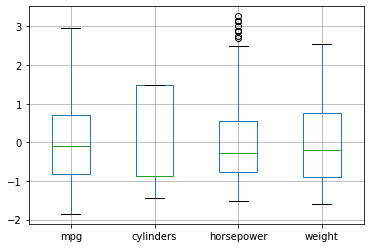

In [17]:
st_df.boxplot()

# X / y Ï†ïÌïòÍ∏∞

<AxesSubplot:>

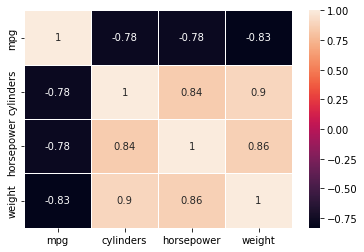

In [32]:
sns.heatmap(st_df.corr(), annot=True, linewidths=0.5)

In [34]:
X=st_df[['weight']]  #ÎèÖÎ¶Ω Î≥ÄÏàò X
y=st_df['mpg']     #Ï¢ÖÏÜç Î≥ÄÏàò Y

# Train / test ÎÇòÎàÑÍ∏∞

In [35]:
from sklearn.model_selection import train_test_split


# 7:3 ÎπÑÏú®Î°ú ÎÇòÎàÑÍ∏∞!
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=42)

In [36]:
print('ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: ', X_train.shape)
print('Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: ', X_test.shape)  

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞:  (274, 1)
Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞:  (118, 1)


# Î™®Ìòï ÌïôÏäµÏãúÌÇ§Í∏∞!

In [37]:
from sklearn.linear_model import LinearRegression #ÏÑ†ÌòïÌöåÍ∑Ä Î∂ÑÏÑù!
from sklearn.preprocessing import PolynomialFeatures # Îã§Ìï≠ÏãùÏúºÎ°ú Î≥ÄÌôò!

In [38]:
poly = PolynomialFeatures(degree= 2)

In [39]:
# 2Ï∞®Ìï≠ ÌöåÍ∑ÄÎ∂ÑÏÑù ÎßûÍ≤å Î≥ÄÌôòÌïòÍ∏∞
X_train_poly= poly.fit_transform(X_train)

In [40]:
print('ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞: ', X_train.shape)
print('2Ï∞®Ìï≠ Î≥ÄÌôò Îç∞Ïù¥ÌÑ∞: ', X_train_poly.shape)  

ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞:  (274, 1)
2Ï∞®Ìï≠ Î≥ÄÌôò Îç∞Ïù¥ÌÑ∞:  (274, 3)


In [41]:
lr = LinearRegression()

In [42]:
# ÌöåÍ∑ÄÎ∂ÑÏÑù ÌïôÏäµÏãúÌÇ§Í∏∞
lr.fit(X_train_poly, y_train)

LinearRegression()

In [43]:
# X_test Îç∞Ïù¥ÌÑ∞Î•º 2Ï∞®Ìï≠ÏúºÎ°ú Î≥ÄÌòï
X_test_poly = poly.fit_transform(X_test)

In [44]:
# ÌïôÏäµÏùÑ ÎßàÏπú Î™®ÌòïÏóê test dataÎ•º Ï†ÅÏö©ÌïòÏó¨ Í≤∞Ï†ïÍ≥ÑÏàò(R-Ï†úÍ≥±) Í≥ÑÏÇ∞
r_square = lr.score(X_test_poly, y_test)

In [45]:
r_square

# 0ÎòêÎäî 1Ïóê Í∞ÄÍπùÏßÄ ÏïäÏïÑÏÑú Ïï†Îß§ÌïòÍ∏¥ÌïòÏßÄÎßå Í∑∏ÎûòÎèÑ ÏßÑÌñâ Í≥†Í≥†

0.6790833164604806

In [46]:
y_hat_test = lr.predict(X_test_poly)

# ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÌèâÍ∞ÄÌïòÍ∏∞

In [52]:
# matplotlibÏùò ÌïúÍ∏Ä Ìè∞Ìä∏Ïò§Î•ò Ï≤òÎ¶¨ (Ï†ÑÏó≠family)
plt.rc("font", family="Malgun Gothic")

# matplotlibÏùò Ï∂ï(axes)Ïùò -Î∂ÄÌò∏ ÌëúÍ∏∞ Ïò§Î•ò Ï≤òÎ¶¨
plt.rc("axes", unicode_minus = False)

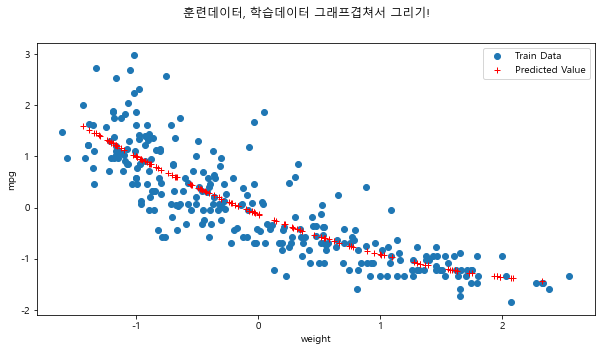

In [54]:
# train dataÏùò ÏÇ∞Ï†êÎèÑÏôÄ test dataÎ°ú ÏòàÏ∏°Ìïú ÌöåÍ∑ÄÏÑ†ÏùÑ Í∑∏ÎûòÌîÑÎ°ú Ï∂úÎ†• 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # Î™®ÌòïÏù¥ ÌïôÏäµÌïú ÌöåÍ∑ÄÏÑ†

ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.suptitle("ÌõàÎ†®Îç∞Ïù¥ÌÑ∞, ÌïôÏäµÎç∞Ïù¥ÌÑ∞ Í∑∏ÎûòÌîÑÍ≤πÏ≥êÏÑú Í∑∏Î¶¨Í∏∞!")


plt.show()
plt.close()

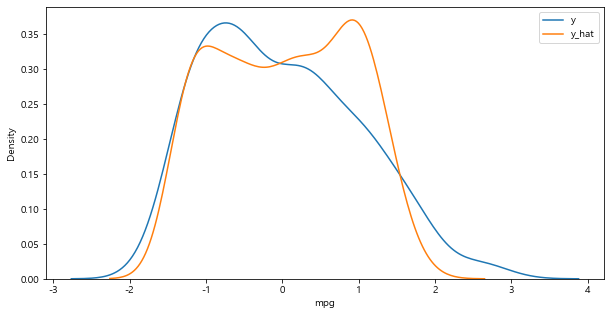

In [56]:
# Î™®ÌòïÏóê Ï†ÑÏ≤¥ X Îç∞Ïù¥ÌÑ∞Î•º ÏûÖÎ†•ÌïòÏó¨ ÏòàÏ∏°Ìïú Í∞í y_hatÏùÑ Ïã§Ï†ú Í∞í yÏôÄ ÎπÑÍµê 
X_ploy = poly.fit_transform(X)
y_hat = lr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

<AxesSubplot:xlabel='mpg', ylabel='Density'>

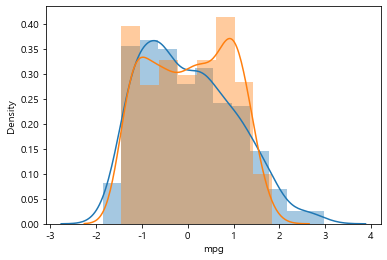

In [63]:
# seabornÏúºÎ°ú Í∑∏Î¶¨Í∏∞

sns.distplot(y)
sns.distplot(y_hat)

> ÏïÑÎûòÏùò Îã®ÏàúÌöåÍ∑Ä Î∂ÑÏÑùÍ≤∞Í≥ºÏôÄ ÏúÑÏùò Îã§Ìï≠ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÎπÑÍµêÌï¥Î≥¥Î©¥ Îæ∞Ï°±ÌñàÎçò Ìé∏Ìñ•ÎêòÎäî Í≤ΩÌñ•Ïù¥ Ï¢ÄÎçî Í∞êÏÜåÌïú Í≤ÉÏùÑ ÏïåÏàò ÏûàÎã§!

<br></br>  
**<Îã®ÏàúÌöåÍ∑ÄÎ∂ÑÏÑù Í∑∏ÎûòÌîÑ üëáüëá>**
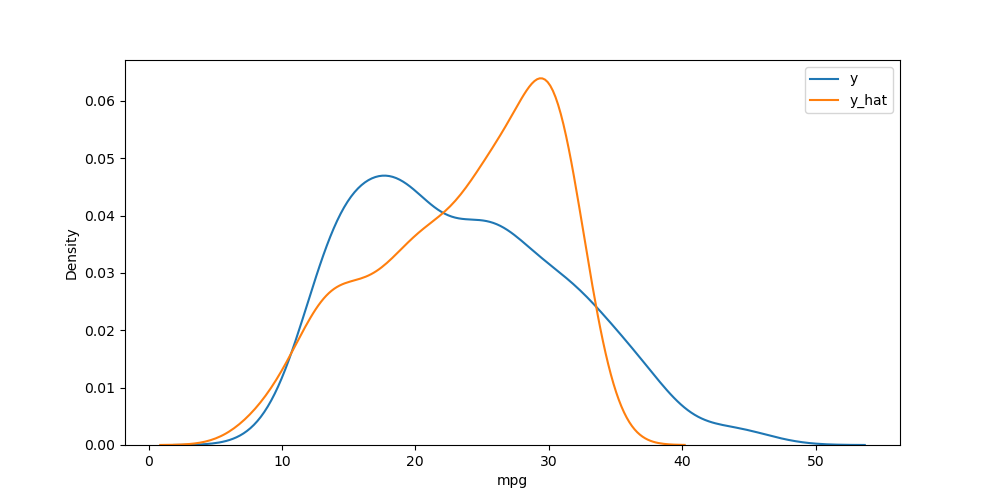

**Ïó¨Îü¨ Í∞úÏùò ÎèÖÎ¶ΩÎ≥ÄÏàò**Í∞Ä Ï¢ÖÏÜçÎ≥ÄÏàòÏóê ÏòÅÌñ•ÏùÑ Ï£ºÍ≥†, ÏÑ†ÌòïÍ¥ÄÍ≥ÑÎ•º Í∞ñÎäî Í≤ΩÏö∞Ïóê **`Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑù(Multivariate Regression)`**ÏùÑ ÏÇ¨Ïö©Ìï¥Î≥¥Ïûê!!